In [ ]:
import random as random
import numpy as np
import matplotlib.pyplot as plt

# 1.Initializing:


self.width: This is the width of the region area, which its value must be entered by the user. This should be integer, as in the question has mentioned. Width of the rectangle is always >0.

self.length: This is the length of the region area, which its value must be entered by the user (same as width). This should be integer, as in the question has mentioned. Length of the rectangle is always >0.

self.reg_area0=Main region area, with desired width and length,which are entered by the user. Since the region area must be a rectangle, width must always be<= length. Since this is the region area before adding any tower to it, we can display it as a 0 array with desired length and width.

self.tower:
This shows the number of towers inside the region area.At first, it is initialized with 0,It is a positive integer.

self.count_area:Integer positive number that counts total footprints of all towers in region area in each Iteration  after resolved coverage, and will be added up after trimming each new tower, if any max area available.


# 2.Modules and their functionalities:  
2.1
This function produces a zeros array with any positive integer width and length, that can be entered by the user. Since the qustion has asked for a region area as a rectangle, we need to consider width<=length, to make a perfect rectangle as a region area.

# 2.2
self.tower is a positive ineteger value, that increases as we add each tower to the region area. Sometimes, when the new tower is completely inside one of the previous towers (let's say the previous resolved area), The number of towers increases, but the matrix and the plot does not change.
The user can change the number of towers as desired in the last part. We'll get to that part in a bit.

# 2.3
self.count_area,is a positive integer number initialized as 0 before adding any tower. As each tower adds up 
in region area, after resolving cover, the new area is added to the previous value of the self.count_area.
Like priviousely mentioned for number_towers, if the new tower is added to the region area, but its inside the      resolved covered area, the the number of towers increse but the count_area remains the same.

# 2.4
    
This function generates random rectangles. In here, we present each rectangle by 4 values:1.Topleft corner in x axis 2.Topleft corner in y axis 3.width of the tower 4.length of the tower, with integer and positive values of width_rec,length_rec and 'xTL',which shows the coordinate of the top left point of the rectangle.
    
each time we call this function, we have a new random rectangle that it's three representive values are chosen from 
uniform random variables. We also need to make some limitations. Each tower that is represented as a rectangle, must be completely inside of the region area. that means, by adding x coordinate of the xTL to its width, the value must be 
 <= region area's width(self.width). Note that we have the same situation for the y axis of the rectangle in its length.
x coordinate value of the xTL,can start from 0, since it must be inside the region area, it must be at most self.width-1,since width of the tower(width_rec) is at least 1 and it can't get more than region area's width(self.width), otherwise, tower won't be completely inside the region area.
same situation for y axis. 

# 2.5

The aim in this part is When a new tower comes online, if its coverage rectangle intersects the pre-existing
composite footprint, then that new tower’s coverage is trimmed such that its maximum remaining coverage area is retained.

# find possible rectangles in iterations:
For this purpose,we decided to find all possible rectangles that can fit in the new rectangle and check if they are valid or not.
        
What we did is that, we start from xTL of the new tower and then add to its length and width,step by step,
so first we add 1 value to width of the xTL[0] then 2 until xTL[0]+width_rec at max,since we want all rectangles to be inside the region area. This is done in a for loop and adding step by step of width is done by variable i.
we do the same thing for length.
so, first we add 1 value to length of the xTL[1] then 2 until xTL[1]+length_rec at max (length_rec is the length of the new tower),since we want all rectangles to be inside region area.This is done in a for loop and adding step by step of width is done by variable j.
        
Then we change the start point,because for finding all possible rectangles inside the region area, we need to change
start point in x and y direction,which is k and h. so instead of starting from xTL[0] and xTL[1], we can start 
from xTL[0]+k, k can change from 0(to make xTL[0]) to (width_rec-1) since we want to find rectangle, so the point can be at max (width_rec-1) to have width of 1. same situation for xTL[1]+h.

In the following line, we try to find all possible rectangles out of new rectangle in the previous resolved covered area, name self.reg_area0.

area=self.reg_area0[t[0]+k:i,t[1]+h:j]


# assumptions needed to consider:
In all these iterations of making possible rectangles, we need to assume 2 things:
        
1.if there already is a rectangle (rectangles overlap in some part or all) desregard that part, and do not make possible rectangle
in that area. We do this by: if not np.any(area) to make sure all the values are 0 and make a new rectangle in a place 
where there have not been any rectangle before.
        
2.We compare the area of each possible valid(not overlapped) rectangle with the previous one, if it is bigger than the last one,we add it to area_1 otherwise,the value of area_1 does not change.

# Choosing the max area rectangle:
At last, we have postions of the new rectangle with max area after resolved cover, which are
xTL[0],xTL[1],xBR[0] (bottom right corner coordinate of x),xBR[1] and put them in position_n, and have the postions of 
new rectangle before trimming and resolving covered area in t.
        
Now if the rectangle is all in the previous resolved area (In here called self.reg_area0), we do not add it to the resolved cover area,
else, after finding max area, we add it to the self.reg_area0 as ones array.


As you can see in the following picture, when entering the first rectangle we have :
before trimming:
[0,1,2,2] #[xTL[0],xTL[1],xBR[0],xBR[1]]
after trimming:
[0,1,2,2]

and the first five lines are posiible rectangles out of this region.
When entering the 2nd rectangle we have:
before trimming:
[0,1,1,2]
after trimming:
[]

and the possible area rectangle found is [1], which means it has overlap with the first rectangle, so the resolved area would be the first rectangle, since the seconf rectangle had a complete overlap eith it.

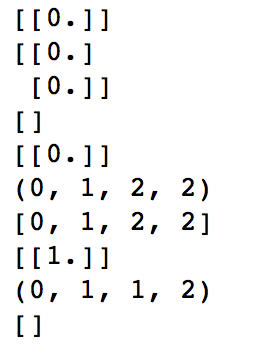

# Show towers as matrices
      
In here we show rectangles in matrices. So at first, we have all zero matrice with desired width and length entered by the user.then a new tower comes, we do the above process and add it to all zero matric as ones matric, then the second tower comes,we do the above for trimming and resolving, then multiply it by 2 and add it as 1*2 matric to the last resolved matric.

# Using plt.matshow for plotting rectangles:  

Basically we multiply the number of a tower in its ones matric here. The Reason is that for showing matrices each time in plt.matshow, different numbers have different colors.so,we used plt.matshow and the number of each tower must be different so they would have different colors when plotting,so they would be seperable.
In each iteration we use np.count_nonzero(self.reg_area0) to count the area footprint of existiong towers (after resolved cover).
the limit that we have is that xTL[0]+width_rec(new rect) must not be bigger than the region area width. We have the same situation for the length. while adding to the width and length of the starting point from xTL, we have to iterate and find different possible rectangles with the limit that we mentioned. 
   
# Problem with plt.matshow()
The problem with this function is that in each loop, it gives yellow color to the last new trimmed rectangle, even when I seperately gave a specific number to each trimmed rectangle, but it did not work.
For example, when want to run the code for 2 towers, at first the first tower that is plotted is yello, the when the second rectangle comes, its color change into yellow and the first rectangle changes color to green-blue.

# deal with the problem
For dealing with the problem, I print out the xTL[0],xTL[1],xBR[0],xBR[1] of the new rect before trimming and after trimming in each loop when entering new rectangle,so you can follow the rectangle by topleft and bottomright corners. 

The other thing is that in plt.matshow(),it shows numbers in the center of the square,like shown in the following picture:



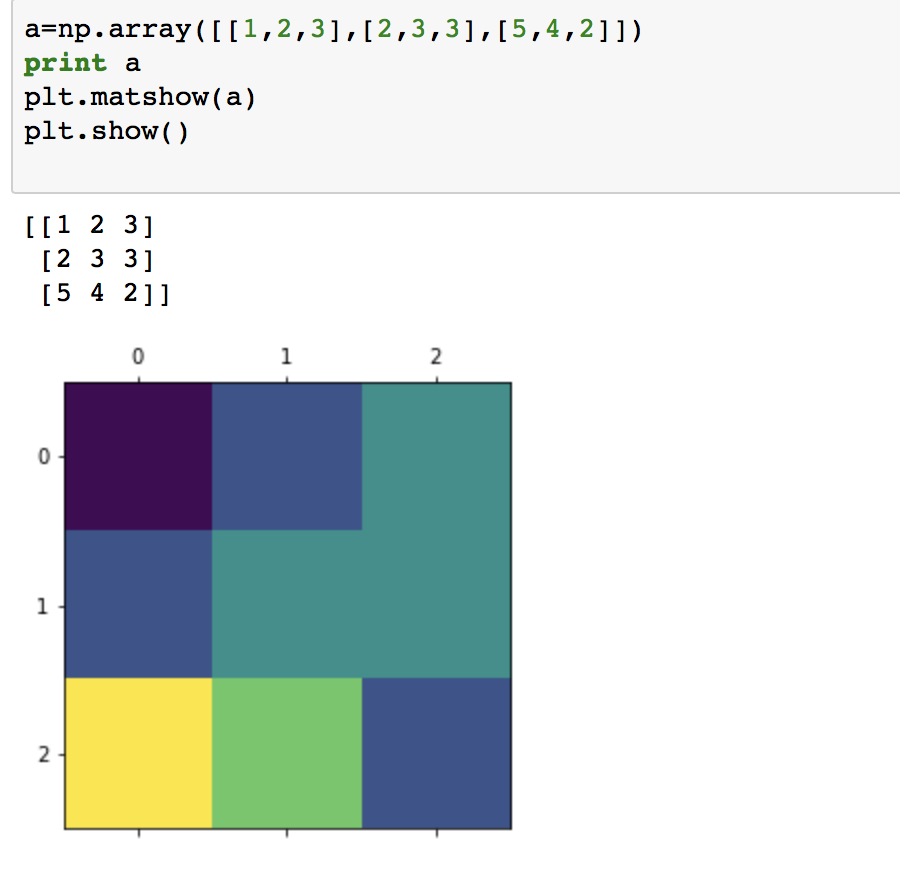







In [ ]:
# 1.Initializing:
class Network (object):


    def __init__(self,width,length):
        
        """
        @param:width:positive,integer:width of the region area
        @param:length:positive,integer:length of the region area
        
        In here we initialize different values that we are going to use their function in the following modules,
        Values initialized:
        @param:self.tower:initialized 0:positive integercounts:number of towers that are in region area.
        @param:self.reg_area0:array of zeros:with desired length and width enterd by user:Introduces the main region area,without any towers in it at first.
        @param:self.count_area:positive:integer:counts total footprints of all towers in each Iteration after trimming an
        """
        
       
        assert width<=length, 'Main shape must be a rectangle, width must be less than or equal with length'
        assert isinstance(width,int) ,'width of the region area should be an integer'
        assert isinstance(length,int), 'length of the region area should be an integer'
        assert width>0 ,'width of the region area must be bigger than zero'
        assert length>0,'length of the region area must be bigger than zero'
        self.width=width
        self.length=length
        self.reg_area0=np.zeros((width,length)) #Main region area, with desired width and length,which entered by the user.
        self.tower = 0       #counts number of towers that are in region area.  
        self.count_area=0 #counts footprints of total resolved coverage by towers in each iteration of entering buildings.
        
        
        #2.Modules and their functionalities:
#2.1
    def region_area(self):
        """
        @param:width:positive integer:width of the main region area:input by the user.
        @param:length:positive integer:length of the main region area:input by the user.
        This function returns a zero matrix , that shows region area before adding any tower to it.
        """
        assert width<=length, 'Main shape must be a rectangle, width must be less than or equal with length'
        assert isinstance(width,int) ,'width of the region area should be an integer'
        assert isinstance(length,int), 'length of the region area should be an integer'
        assert width>0 ,'width of the region area must be bigger than zero'
        assert length>0,'length of the region area must be bigger than zero'
        
        return self.reg_area0
    
    #2.2
    def number_tower(self):
        """
        self.tower is a positive ineteger value, that increases as we add each tower to the region area
        """
        return self.tower
    
    #2.3
    def count_area(self):
        """
        self.count_area,is a positive integer number initialized as 0 before adding any tower. As each tower adds up 
        in region area, after resolving cover, the new area is added to the previous value of the self.count_area.
        """
        return self.count_area
    
    #2.4
    def get_tower(self):

        """
        Each rectangle is presented by 4 values:1.Topleft corner in x axis 2.Topleft corner in y axis 3.width of the tower 4.length of the tower
        xTL0:x axis of the top left corner of the rectangle, limit it to make sure it is inside the region area.
        xTL1:y axis of the top left corner of the rectangle, limit it to make sure it is inside the region area
        width_rec:defines width of each tower inside the region area. limit its value to make sure it is inside the region area.
        length_rec:defines length of each tower inside the region area. limit its value to make sure it is inside the region area.
        """    
        xTL0=random.randint(0,self.width-1) #x axis of the top left corner of the rectangle, limit it to make sure it is inside the region area.
        xTL1=random.randint(0,self.length-1) #y axis of the top left corner of the rectangle, limit it to make sure it is inside the region area.
        xTL=[xTL0,xTL1]
        width_rec=random.randint(1,self.width-xTL0) #defines width of each tower inside the region area. limit its value to make sure it is inside the region area.
        length_rec=random.randint(1,self.length-xTL1)#defines length of each tower inside the region area. limit its value to make sure it is inside the region area.

        return xTL0,xTL1,width_rec,length_rec # each rectangle is presented by 4 values:1.Topleft corner in x axis 2.Topleft corner in y axis 3.width of the tower 4.length of the tower
    
    #2.5
        
    def resolved_shape(self):
        
        """
        In this part, we find the possible rectangles in a new rectangle that is defined as t,then check its validity.
        If it is completely inside the last resolved covered area, we do not make any change, else we add the rectangle
        that has the max area in the new tower added.
        then if the possible rectangle is bigger than the previous possible rectangle, we change the value of area_1, else 
        we keep the previous value of area_1.
        
        At last we add xTL(Top left corner of the new resolved rectangle (after trimming and finding max area out of new rectangle))
        and xBR(bottom right corner of the new resoved rectangle) to the position_n, then add this new resolved rec to the previous 
        matric of resolved covered area which is called  self.reg_area0.
        
        we plot matrices using plt.matshow.
        """
        position_n=[] #After trimming and resolved coverage,shows the x and y coordinate of xTL and x and y coordinate of xBR(bottom right corner of the new max area rectangle, if any).
        area_1=0 #keeps the max area in each iteration.
        t=self.get_tower() #recall the function self.tower and name it t
        for k in range(t[2]): #change corners (in x axis)of the start point.
            for h in range(t[3]):#change corners (in y axis)of the start point.
                for i in range(t[0]+1,t[2]+t[0]+1): #change width of posiible rectangles
                    for j in range(t[1]+1,t[3]+t[1]+1):#change length of the posiible rectangles 
                        area=self.reg_area0[t[0]+k:i,t[1]+h:j] #finding possible rectangles out of new rec in previous resolved covered area.
                        if not np.any(area): #not overlapping with previous rectangles.
                            if (area.size>area_1): #make sure bigger than other posiible rectangles
                                a=np.ones((area.shape[0],area.shape[1]))
                                position_n.append(k+t[0])
                                position_n.append(h+t[1])
                                position_n.append(i)
                                position_n.append(j)
                                area_1=area.size
                

        position_n=position_n[-4:]
        
        print (t[0],t[1], t[0]+t[2], t[1]+t[3]) #new rectangle before trimming and find max area rectangle out of it
        print (position_n) #new rectangle after trimming and find max area rectangle out of it

        
        
        if np.all(self.reg_area0[t[0]:t[0]+t[2],t[1]:t[1]+t[3]]): #completely covered in last resolved covered area
            self.reg_area0=self.reg_area0
        else: 
            self.reg_area0[position_n[0]:position_n[2],position_n[1]:position_n[3]]=a * (self.tower+1) 
        
        self.count_area=(np.count_nonzero(self.reg_area0))
        self.tower += 1
        plt.matshow(self.reg_area0)
        plt.title('resolved coverage')
         
        plt.show() 
        
    
    
    
    

# Running the code

In here, we can determine width and length of the total region area and number of towers which is shown by n.

Elements that are print and plotted are:

1.new rectangle position before trimming and finding max area rectangle out of it:
[xTL[0],xTL[1],xBR[0],xBR[1]]. #TL:Top Left, BR:Bottom Roght corner coordinates

2.new rectangle position after trimming and finding max area rectangle out of it:
[xTL[0],xTL[1],xBR[0],xBR[1]]. #TL:Top Left, BR:Bottom Roght corner coordinates

3.visualized resolved plot

4.foot print coverage by towers after trimming and resolving.


5.Number of towers added to the total region area.


6.Percentage that is filled with trimming towers over total region area.


In [ ]:
a=Network(5,5) #change the value of width and length in the main region area.
n=3  #change 3 and enter number of buildings
for i in range (n): #change the number of range(n), to change the number of towers in the problem. 
    a.resolved_shape() #prints out the resolved shape 
    print a.count_area #foot print coverage by towers after trimming and resolving
    print a.tower #shows number of towers
    print (a.count_area/float(a.width*a.length))*100 #shows the percentage that is filled with trimming towers over total region area


In [ ]:
a=Network(5,5) #change the value of width and length in the main region area.
def find_average():#this functio,gives us the number of communication towers before full coverage is obtained.
    while a.count_area<a.width*a.length:
        a.resolved_shape()
    return a.tower

find_average()
